# 실습1

## 01 회귀 소개

### 1-1. 회귀란? (2점)

데이터가 평균과 같은 일정한 값으로 돌아가려는 성질

### 1-2. 회귀는 1)______ 2)______ 3) ______ 에 따라 여러 유형으로 나눌 수 있다. 빈칸을 채우시오 (2점)  

1) 회귀 계수의 선형/비선형 여부
2) 독립변수의 개수
3) 종속변수의 개수

# 실습2

## 02 단순 선형 회귀를 통한 회귀 이해

### 2-1. 단순 선형 회귀란? (2점)

독립변수도 하나, 종속변수도 하나인 선형 회귀

### 2-2. 머신러닝 회귀 예측의 핵심은 무엇인가? (2점)

주어진 feature 와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

### 2-3. 잔차에 대해서 최적의 회귀모델의 의미와 관련하여 설명하시오 (2점)

실제 값과 회귀 모델의 차이에 따른 오류 값을 잔차라고 하고\
최적의 회귀 모델을 만든다는 것은 잔차의 합이 최소가 되는 모델을 만든다는 의미이다

### 2-4. 최소제곱법을 활용한 단순 선형회귀 문제입니다. 두 연속형 변수  (X,Y)를 측정한 자료값이 (-1, 1), (1,1), (0,0),(3,1), (2, 2)이다.  이 자료를 바탕으로 회귀식을 구하고 x=6일때, y값이 얼마인지 예측하세요. (10점)

###    2-4-1. x와 y 각각의 평균을 구하세요. (x̄, ȳ) 형태로 답을 쓰세요.(2점)

In [1]:
import numpy as np
x = [-1, 1, 0, 3, 2]
y = [1, 1, 0, 1, 2]
mx = np.mean(x)
my = np.mean(y)

np.mean(x), np.mean(y)

(1.0, 1.0)

답 : (1, 1)

### 2-4-2. a=Σ(x-x̄)(y-ȳ) 와 b=Σ{(x-x̄)^2} 을 구하세요. (a,b)형태로 답을 쓰세요.(2점)

In [2]:
a = []
b = []
for i, j in zip(x, y):
    a.append((i-mx)*(j-my))
    b.append((i-mx)*(i-mx))
sum(a), sum(b)

(2.0, 10.0)

답 : (2, 10)

### 2-4-3. 회귀식을 구하세요(a/b로 기울기를 구하고 (x̄, ȳ)를 대입해 y절편을 구합니다) (3점)

y = (1/5)x

### 2-4-4. x=6 일때의 y값을 예측해 보세요 (3점)

답 : 6/5 또는 1.2

# 실습3

# 03 비용 최소화하기 - 경사하강법

3-1) 경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나갑니다.

만약 비용 함수가 밑에 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최소 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트 합니다. 이 때, 비용함수가 최소인 지점은 무슨색깔 점일까요? (4점)

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

from IPython.display import Image
Image('/gdrive/My Drive/gradient.PNG')

ModuleNotFoundError: No module named 'google'

답) 주황색 점

3-2) 이 점이 최소인 이유는 무엇일까요?(미분된 1차 함수의 기울기와 관련하여 설명해주세요) (3점)

답) 1차 미분했을 때 기울기가 0이기 때문에

3-3) 비용함수를 미분해서 미분 함수의 최솟값을 구하려면 미분을 해야하지만, 비용함수는 두개의 w 파라미터인 w0와 w1을 가지고 있기 때문에 일반적인 미분을 할 수 없습니다. 비용함수를 최소화하는 w0와 w1는 어떻게 구할 수 있을까요? (3점)

답) 경사하강법을 쓰면 됩니다 !

### 실습에 앞서, 아래의 코드를 실행시켜주세요. 실습에 사용되는 X, y데이터를 만드는 과정입니다.

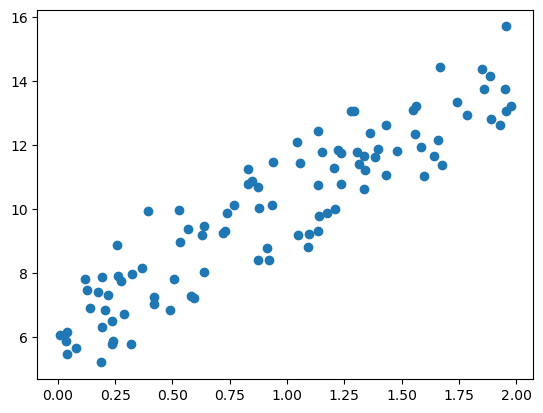

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y - 4x + 6에 근사시킵니다.(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만들어줍니다.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화해줍니다. 잘 나오는지 함 확인해주세요!!
plt.scatter(X,y)
plt.show()

### 3-4. 다음 빈칸에 알맞은 코드를 작성해주세요.(4점)

밑의 w1_update, w0_update를 계산하는 공식은 각각  $\eta$ $2 \over N $ $\displaystyle\sum_{i=1}^{N}$ $x_i \times (예측오류_i)$, $\eta$ $2 \over N $ $\displaystyle\sum_{i=1}^{N} $ $ (예측오류_i) $ 입니다.

In [5]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환하는 함수입니다.
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화해줍니다.
    w1_update = np.zeros_like(w1) # 힌트 : w1은 스칼라가 아닌 벡터값입니다!
    w0_update = np.zeros_like(w1) # 힌트 : w0은 스칼라가 아닌 벡터값입니다!

    # 예측 배열을 계산하고 예측과 실제 값의 차이를 계산해줍니다.
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1을 가진 행렬을 생성해줍니다.
    w0_factors = np.ones((N, 1)) # 힌트 : 1은 1인데 스칼라 1이 아닌 행렬입니다!

    # w1과 w0을 업데이트할 w1_update와 w0_update를 계산합니다.
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # 힌트 : 문제 밑 문장을 참고해주세요!
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))  # 힌트 : 22

    return w1_update, w0_update

### 3-5. 다음 빈칸에 알맞은 코드를 작성해주세요.(3점)

코드 작성하실 때 learning_rate는 0.01로 해주세요!

In [6]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용하는 함수입니다.
def gradient_descent_steps(X, y, iters = 10000):
    # w0와 w1을 모두 0으로 초기화합니다.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0를 업데이트 수행합니다.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01) # 힌트 : get_weight_updates() 함수를 사용해주세요! learning_rate는 0.01로 해주세요!
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

### 3-6. 다음 빈칸에 알맞은 코드를 작성해주세요.(3점)

cost를 계산하는 공식은 다음과 같습니다 : $1 \over N $ $\displaystyle\sum_{i=1}^{N} $ $ (실제값_i - 예측값_i)^2 $

코드 작성하실 때 iters는 1000으로 해주세요!

In [7]:
# 해당 함수는 비용 함수를 정의하는 함수입니다. N과 실제값과 예측값으로 비용함수를 계산합니다.
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N # 힌트 : 문제 밑 문장을 참고해주세요!
    return cost

# w1과 w0를 구하고, 최종적으로 예측값과 실제값의 RSS 차이를 계산해봅시다.
w1, w0 = gradient_descent_steps(X, y, iters = 1000) # 힌트 : 위에서 작성했던 gradient_descent_steps()함수를 사용해주세요! iters는 1000으로 해주세요!
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0 # 힌트 : w1의 [0,0]값과 X를 곱하고, 거기에 w0의 값을 더해주세요.
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


### 여러분이 경사하강법으로 계산한 뛰어난 성과를 눈으로 감상해보세요!!

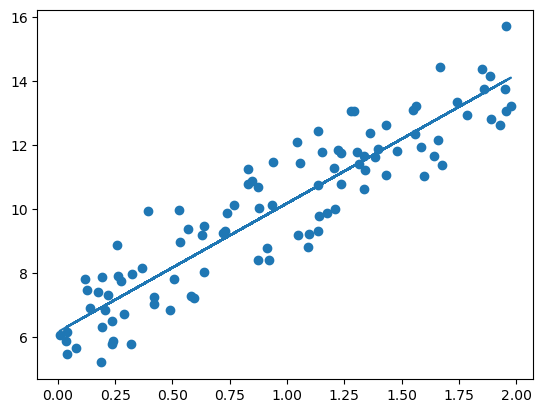

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)

## 03-A 확률적 경사 하강법(Stochastic Gradient)

### 1. 확률적 경사 하강법이 경사 하강법에 비해 빠른 속도를 보장하는 이유를 설명해주세요 (3점)

답) 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사하강법에 비해 빠른 속도를 보장한다

### 2. 확률적 경사 하강법은 3-2에서 구현한 gradient_descent_steps()와 크게 다르지 않습니다. stochastic_gradient_descent_steps()를 구현해 봅시다.(4점)

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

### 3.  3-3에서 구현한 get_cost()를 활용해봅시다. stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용을 계산해주세요. (3점)

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Total Cost:0.9937


# 실습4

보스턴 주택 가격 데이터('boston.csv')를 이용하여 주택 가격을 예측고자 합니다. 이 데이터셋은 1970년대 중반 보스턴 지역의 주택 가격과 관련된 정보를 포함하고 있습니다.  

[피처 소개]  
CRIM: 지역별 범죄 발생률  
ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
NDUS: 비상업 지역 넓이 비율  
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX: 일산화질소 농도  
RM: 거주할 수 있는 방 개수  
AGE: 1940년 이전에 건축된 소유 주택의 비율  
DIS: 5개 주요 고용센터까지의 가중 거리  
RAD: 고속도로 접근 용이도  
TAX: 10,000달러당 재산세율
PTRATIO: 지역의 교사와 학생 수 비율  
B: 지역의 흑인 거주 비율  
LSTAT: 하위 계층의 비율  
PRICE: 본인 소유의 주택 가격(중앙값)    **[target값]**




In [11]:
# 코드를 실행해주세요
# 필요할 경우 'boston.csv' 데이터 파일의 경로를 수정해주세요.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#boston 데이터셋 로드 및 데이터프레임 생성
bostonDF = pd.read_csv('boston.csv')

### 문제 4-1  
총 8개의 칼럼('RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD')에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인하고자 합니다. seaborn의 regplot() 함수를 활용하여 산점도와 함께 선형 회귀 직선을 그려주세요.

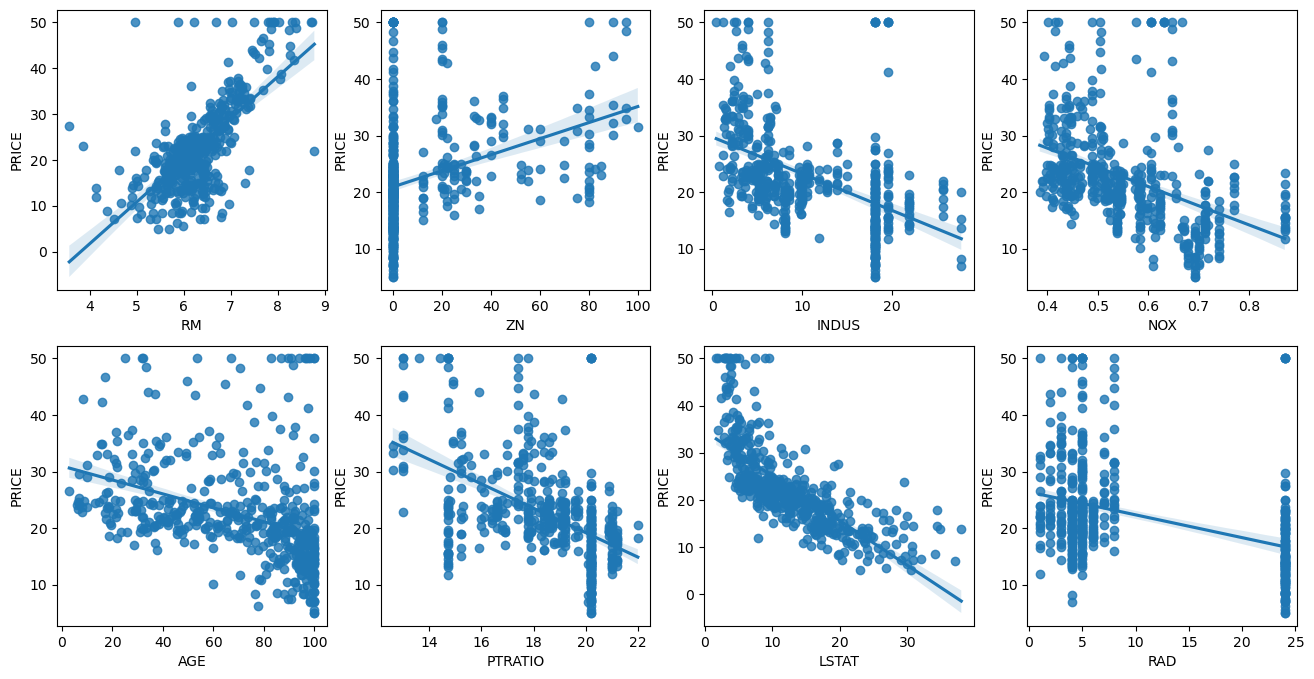

In [12]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows =2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# (힌트: for 구문 활용)
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

### 문제 4-2
8개의 컬럼 중 PRICE 영향도가 가장 두드러지게 나타나는 컬럼 2개는 무엇인가요?  
(위의 코드에서 출력된 그래프 참고)

<span style='color:red'>답: </span> RM, LSTAT

### 문제 4-3
(a)에 해당하는 단어를 작성해주세요.  
[ 위의 그래프를 통해 LSTAT이 적을수록 PRICE가 증가한다는 것을 확인할 수 있습니다. 이를 통해 LSTAT는 (a) 방향의 선형성이 비교적 크다는 것을 알 수 있습니다. ]


<span style='color:red'>답: </span> 음 -> 반비례한다는 의미

### 문제 4-4
Linear Regression OLS로 학습/예측/평가를 수행한 후, mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score를 측정해주세요.  
(MSE, RMSE, R2 score을 출력해주세요.)

In [13]:
# 아래의 코드를 실행해주세요

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis =1, inplace =False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state =156)


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance Score : 0.757


### 문제 4-5
LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 codfficients(회귀 계수) 값을 출력해주세요.

In [15]:
'''답안 작성'''
print('절편값 :' , lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_, 1))

절편값 : 40.99559517216467
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


### 문제 4-6
5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해주세요. (cv=5)

In [16]:
# 아래 코드를 실행해주세요.

from sklearn.model_selection import cross_val_score

coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

In [17]:
'''답안 작성'''
# MSE, RMSE를 측정하세요.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 출력하세요.
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


### 문제 4-7

다음 문장에서 (a), (b)에 들어갈 단어를 순서대로 쓰세요.  

[회귀 평가 지표 중 실제 값과 예측값의 차이를 절댓값으로 변환해 평균을 낸 것은 (a)이며, 실제 값과 예측값의 차이를 제곱해 평균한 것은 (b)라고 한다. ]

<span style='color:red'>답: </span> MAE, MSE

# 실습5

## 다항회귀와 과적합

#### 문제 5-1.
다항회귀식 $ \hat{y}=w_0+w_1x_1x_2+\cdots+w_{n-1}x_{n-1}^3+w_nx_n^2 $ <br> 에 대해 다음 질문에 O,X로 답하세요.
1. 다항회귀식은 비선형함수이다.
2. 위의 다항회귀는 비선형회귀분석이다.

<span style='color:red'>1번 답: </span> X <br>
<span style='color:red'>2번 답: </span> X

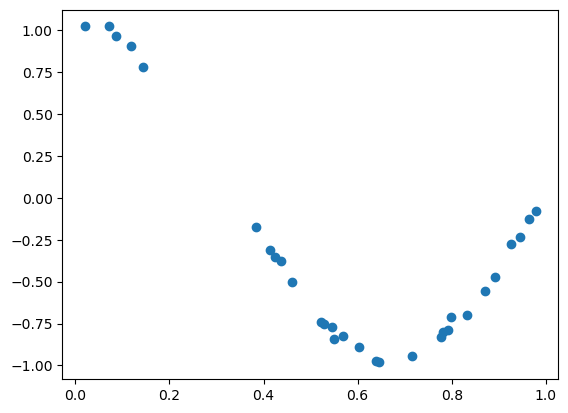

In [18]:
# 문제아님
np.random.seed(0)
# 코드를 실행하세요.
def true_func(X):
    return np.cos(1.5*np.pi*X)
X = np.sort(np.random.rand(30))
y = true_func(X) + np.random.rand(30)*0.1
plt.scatter(X,y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

#### 문제 5-2.
degree가 2인 다항회귀분석을 수행하고 그래프를 그려 확인해보세요

In [19]:
# 문제아님
# 코드를 실행하세요.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [20]:
# 선형회귀모델을 lr_d2 변수명으로 생성하고,
# X_poly 데이터를 활용하여 모델을 학습시키세요.
lr_d2 = LinearRegression()
lr_d2.fit(X_poly, y)

# 예측을 수행하고 결과를 y_pred 변수에 저장하세요.
y_pred = lr_d2.predict(X_poly)

# 모델의 회귀계수를 lr_coef 변수에 저장하고
# 코드를 실행하여 다항회귀식을 확인해보세요.
lr_coef = lr_d2.coef_
print('다항선형회귀식: y={}+({})x+({})x^2'.format(
    np.round(lr_d2.intercept_[0],2),np.round(lr_coef[0][1],2),np.round(lr_coef[0][2],2)))

다항선형회귀식: y=1.54+(-7.23)x+(5.56)x^2


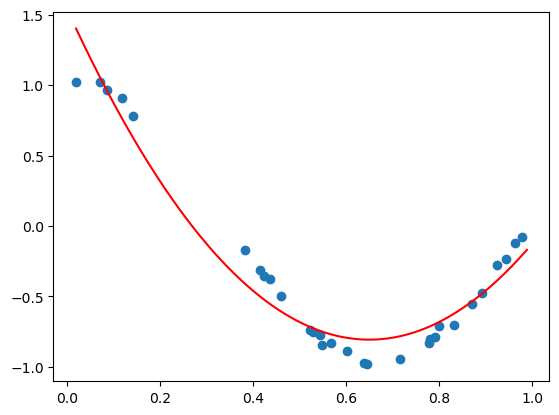

In [21]:
# 문제 아님
# 코드를 실행하여 그래프를 확인하세요. (그래프를 그리기 위한 코드)
X_for_plot = np.arange(0.02,0.99,0.001).reshape(-1,1)
X_for_plot_poly = poly.fit_transform(X_for_plot)
plt.scatter(X,y)
plt.plot(X_for_plot,lr_d2.predict(X_for_plot_poly),color='red')

In [22]:
from sklearn.pipeline import Pipeline

#### 문제 5-3.
degree=16인 다항회귀분석을 수행해보세요.(X,y 데이터 그대로 사용)<br>
이번엔 Pipeline 클래스를 활용해 다항회귀분석을 한 번에 구현해보세요.

In [23]:
# Pipeline객체를 생성하고 model 변수에 저장하세요.
model = Pipeline([('poly', PolynomialFeatures(degree = 16)),
                 ('linear', LinearRegression())])

# model 객체로 학습을 수행하세요.
model = model.fit(X,y)

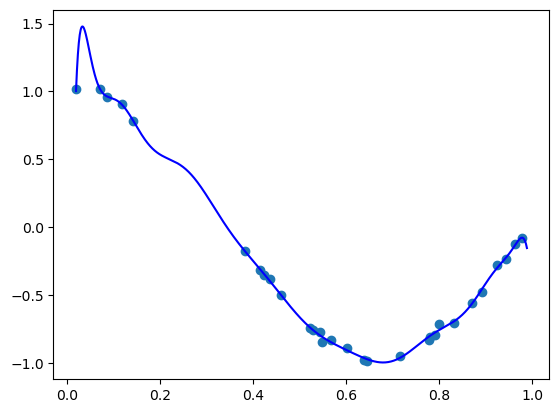

In [24]:
# 문제 아님)
# 코드를 실행하여 degree=16인 다항회귀식의 그래프를 확인해보세요.
# 코드를 실행하여 그래프를 확인하세요. (그래프를 그리기 위한 코드)
plt.scatter(X,y)
plt.plot(X_for_plot,model.predict(X_for_plot),color='blue')

In [25]:
from sklearn.metrics import r2_score

#### 문제 5-4. 분산-편향 트레이드오프

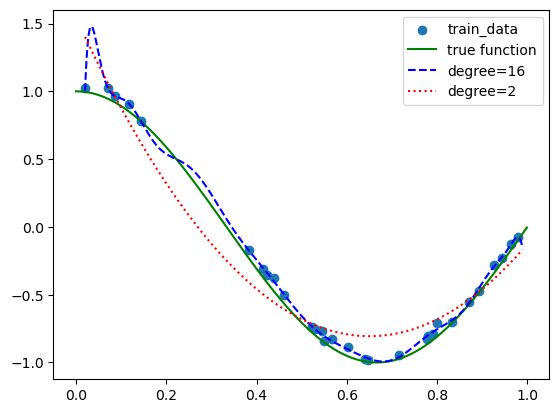

In [26]:
# 문제 아님
# 맨 위의 true_func() 함수가 실제 y값에 대한 함수이다.
# 아래 코드를 실행해 모든 그래프를 한 번에 확인해보세요.
X_true = np.arange(0.00,1.0,0.001).reshape(-1,1)
y_true = true_func(X_true)
plt.scatter(X,y,label='train_data')
plt.plot(X_true,y_true,color='green',label='true function')
plt.plot(X_for_plot,model.predict(X_for_plot),color='blue',label='degree=16',
        linestyle='--')
plt.plot(X_for_plot,lr_d2.predict(X_for_plot_poly),color='red',label='degree=2',
        linestyle=':')
plt.legend(loc='best')

In [27]:
# 문제 아님
# 학습된 모델 lr_d2와 model을 사용하여 예측값을 저장합니다.
lr_d2_pred = lr_d2.predict(poly.fit_transform(X_true))
lr_d16_pred = model.predict(X_true)

# 각각의 R-squared 점수를 lr_d2_r2와 lr_d15_r2에 저장합니다.
lr_d2_r2 = r2_score(y_true,lr_d2_pred)
lr_d16_r2 = r2_score(y_true,lr_d16_pred)

# 결과 확인.
print('degree=2일 때 결정계수: ',lr_d2_r2)
print('degree=20일 때 결정계수: ',lr_d16_r2)

degree=2일 때 결정계수:  0.9243043674691815
degree=20일 때 결정계수:  0.6728975729487152


#### 다음 질문에 답변하세요.
1. 위의 결정계수(R-squared) 지표를 보고 어떤 모델의 성능이 더 우수한지 평가해보세요.
2. 선형회귀모델의 차수(degree)에 따라 분산과 편향에 어떤 차이가 나타나는지 설명해보세요.

<span style='color:red'>1번 답: </span> lr_d2 <br>
<span style='color:red'>2번 답: </span> degree가 너무 낮으면 고편향성, degree가 너무 높으면 고분산성을 가진다.